Part 2: Qualitative Analysis
Create a presentation using Google Slides (max. 5 slides) using the data above (and additional data from those tables) that make clear recommendations on how people can create a successful Kickstarter campaign.

* **Is there an ideal month/day/time to launch a campaign?**

In [114]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
from tools.helpers import read_json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [8, 2]

In [116]:
in_csv = 'data/input/DSI_kickstarterscrape_dataset.csv'
df = pd.read_csv(in_csv, encoding="ISO-8859-1")
# if need to convert back to utf-8 https://stackoverflow.com/questions/42456867/convert-pandas-dataframe-to-utf8

df = df.rename(columns=lambda x: x.replace(' ', '_'))
df['uid'] = df.index + 1

In [117]:
# bar plot showing successful vs. unsuccessful plots by category
df.dtypes

project_id             int64
name                  object
url                   object
category              object
subcategory           object
location              object
status                object
goal                 float64
pledged              float64
funded_percentage    float64
backers                int64
funded_date           object
levels                 int64
reward_levels         object
updates                int64
comments               int64
duration             float64
uid                    int64
dtype: object

In [118]:
df['funded_date'] = df.funded_date.astype('datetime64[ns]')
df['duration'] = df['duration'].astype('timedelta64[D]')
df['launch_datetime'] = df.funded_date - df.duration

In [128]:
df['launch_month'] = df['launch_datetime'].dt.month
df['launch_day_of_week'] = df['launch_datetime'].dt.dayofweek
# It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6. 
df['launch_time_of_day'] = df['launch_datetime'].dt.time
#df['launch_time_of_day'] = df['launch_time_of_day'].dt.round('Hour')  
df['launch_time_of_day_hour'] = df['launch_datetime'].dt.round('H').dt.hour

In [129]:
dfk = df[(df.status != 'live')].copy()

dfk['Final Status'] = np.where(dfk['status']=='successful', 'successful', 'unsuccessful')

dff = dfk[['uid', 'launch_month', 'launch_day_of_week', 'launch_time_of_day_hour', 'Final Status']]

In [130]:
df_month = dff[['uid', 'launch_month', 'Final Status']].groupby(['launch_month', 'Final Status'], as_index=False).count()

In [131]:
#df_month.plot(df_month.launch_month, df_month.uid, df_month['Final Status'])

([<matplotlib.axis.XTick at 0x11fae0240>,
 <a list of 12 Text xticklabel objects>)

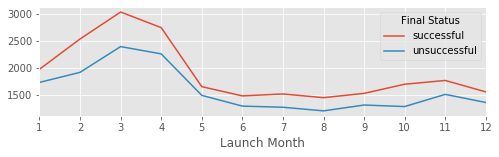

In [132]:
dff[['uid', 'launch_month', 'Final Status']].groupby(['launch_month', 'Final Status']).count()['uid'].unstack().plot()

plt.xlabel('Launch Month')
plt.xticks([1., 2., 3., 4., 5., 6., 7, 8., 9., 10., 11., 12.])

([<matplotlib.axis.XTick at 0x118424ac8>,
 <a list of 7 Text xticklabel objects>)

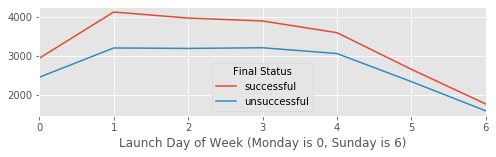

In [125]:
dff[['uid', 'launch_day_of_week', 'Final Status']].groupby(['launch_day_of_week', 'Final Status']).count()['uid'].unstack().plot()

plt.xlabel('Launch Day of Week (Monday is 0, Sunday is 6)')
plt.xticks([0., 1., 2., 3., 4., 5., 6.])

([<matplotlib.axis.XTick at 0x11f7eeb70>,
 <a list of 24 Text xticklabel objects>)

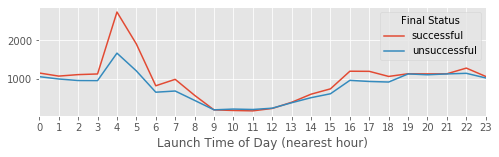

In [135]:
dff[['uid', 'launch_time_of_day_hour', 'Final Status']].groupby(['launch_time_of_day_hour', 'Final Status']).count()['uid'].unstack().plot()

plt.xlabel('Launch Time of Day (nearest hour)')
plt.xticks([0., 1., 2., 3., 4., 5., 6., 7, 8., 9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,])

In [136]:
df_month

,launch_month,Final Status,uid
0,1,successful,1977
1,1,unsuccessful,1734
2,2,successful,2538
3,2,unsuccessful,1920
4,3,successful,3037
5,3,unsuccessful,2397
6,4,successful,2748
7,4,unsuccessful,2262
8,5,successful,1655
9,5,unsuccessful,1494
